In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [2]:
from matplotlib import ticker
import sys

sys.path.insert(1, "../python/")
import util

# Tests with short 1 ns trajectories

In [23]:
traj1 = np.loadtxt("../abmd/test_1/abmd-1.out")
traj2 = np.loadtxt("../abmd/test_1/abmd-2.out")
traj3 = np.loadtxt("../abmd/test_1/abmd-3.out")

In [3]:
with open("../abmd/test_1/abmd-1.out", mode="r") as f:
    print(next(f))

#! FIELDS time s4p.x s4p.y s4p.z refp.x refp.y refp.z z abmd.bias abmd.z_min abmd.force2



In [18]:
traj1.shape

(250, 11)

Text(0, 0.5, 'z (nm)')

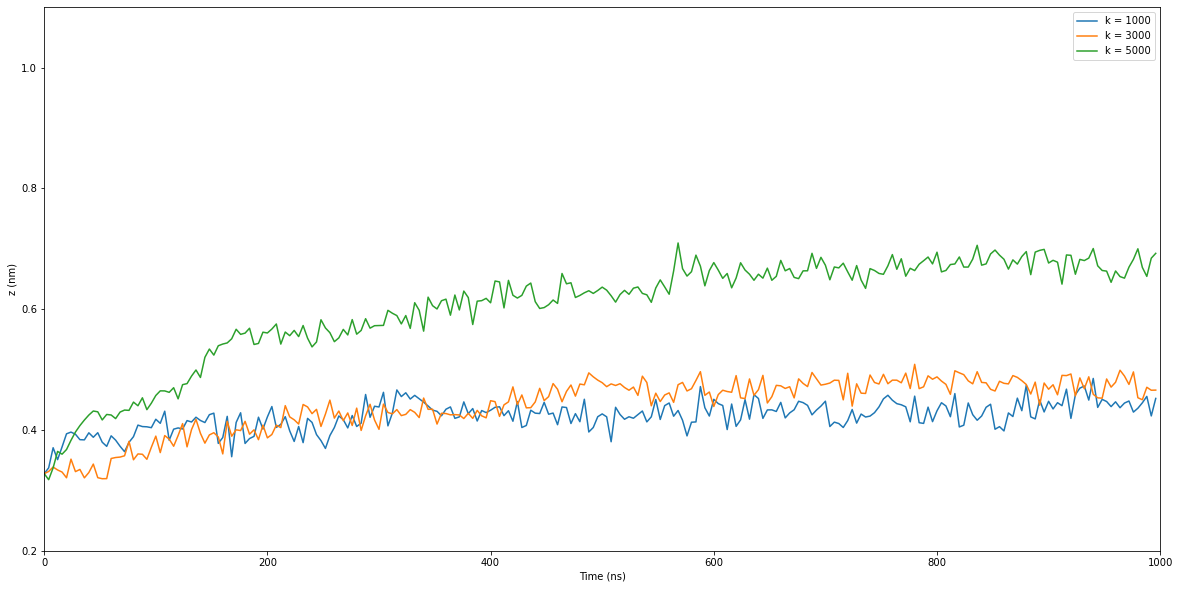

In [29]:
x = np.linspace(0, 996, 250)
f = plt.figure(figsize=(20, 10))
plt.plot(x, traj1[:, 7], x, traj2[:, 7], x, traj3[:, 7])
plt.legend(["k = 1000", "k = 3000", "k = 5000"])

plt.xlim([0, 1000])
plt.ylim([0.2, 1.1])
plt.xlabel("Time (ns)")
plt.ylabel("z (nm)")

##  how does z coordinate correlate with distance CV

In [31]:
ds1 = np.loadtxt("../abmd/test_1/ds_abmd_test_1.txt")
ds2 = np.loadtxt("../abmd/test_1/ds_abmd_test_2.txt")
ds3 = np.loadtxt("../abmd/test_1/ds_abmd_test_3.txt")

In [34]:
ds1.shape

(26, 2)

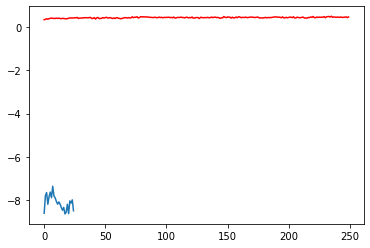

In [39]:
plt.plot(ds1[:-1, 0])
plt.plot(traj1[:, 7], "r")

# Longer trajectories 

Down to up

In [25]:
traj4 = np.loadtxt("../abmd/run_0/plumed.txt")
traj5 = np.loadtxt("../abmd/run_1/plumed.txt")
traj6 = np.loadtxt("../abmd/run_2/plumed.txt")

Text(0, 0.5, 'z (nm)')

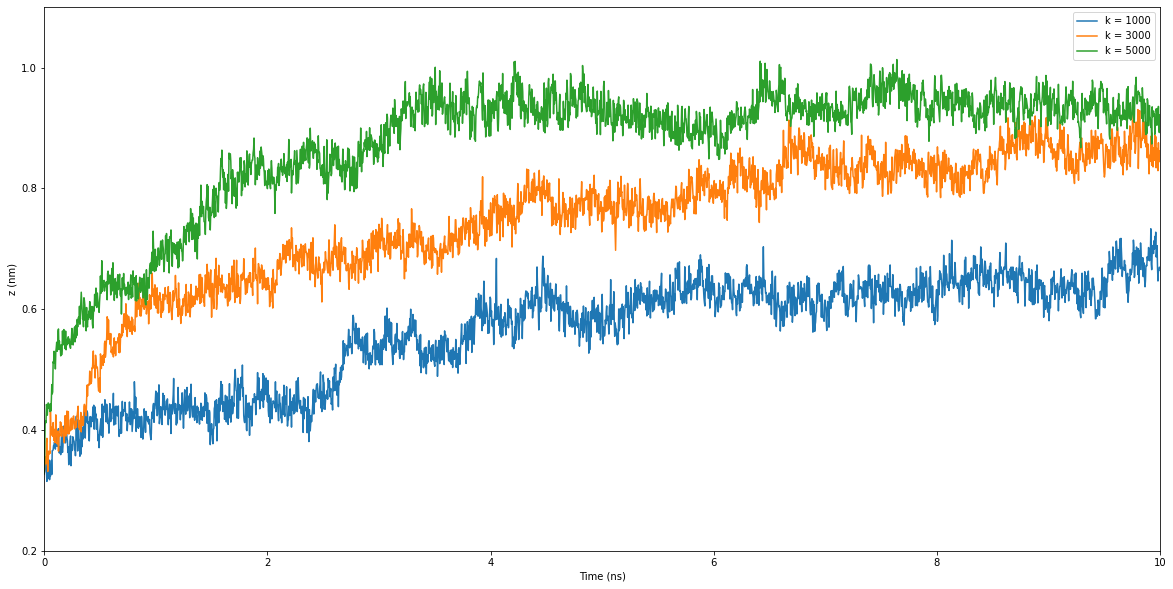

In [27]:
x = np.linspace(0, 9996 / 1000, 2500)
f = plt.figure(figsize=(20, 10))
plt.plot(x, traj4[:, 7], x, traj5[:, 7], x, traj6[:, 7])
plt.legend(["k = 1000", "k = 3000", "k = 5000"])
plt.xlim([0, 10])
plt.ylim([0.2, 1.1])
plt.xlabel("Time (ns)")
plt.ylabel("z (nm)")

Up to down

In [44]:
traj_ud_1 = np.loadtxt("../abmd/run_3/plumed.txt")
traj_ud_2 = np.loadtxt("../abmd/run_4/plumed.txt")
traj_ud_3 = np.loadtxt("../abmd/run_5/plumed.txt")

Text(0, 0.5, 'z (nm)')

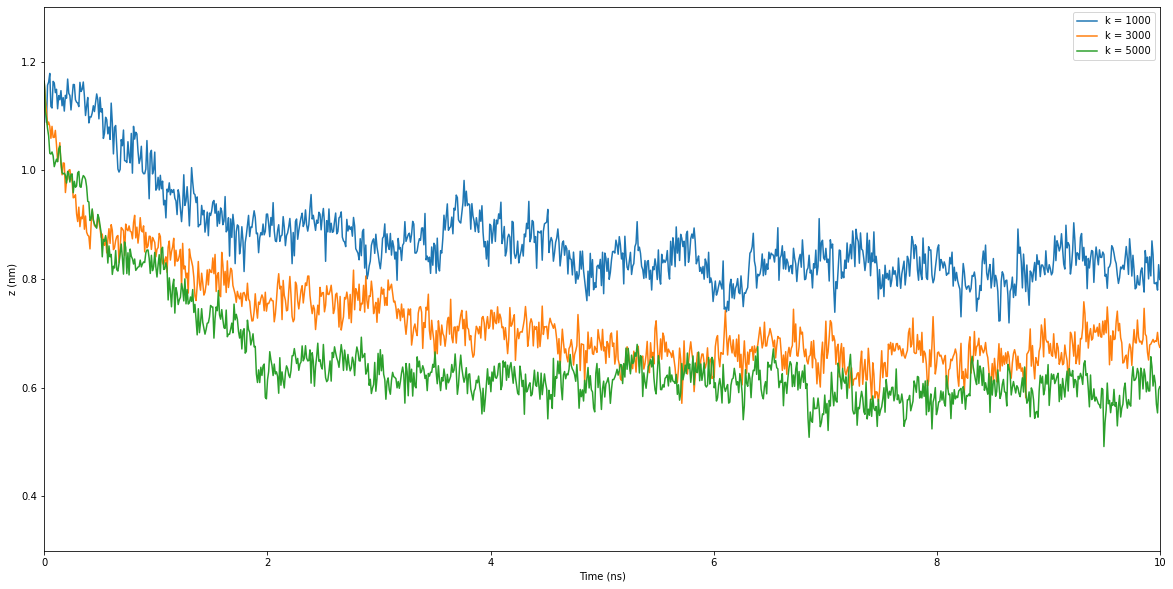

In [47]:
f = plt.figure(figsize=(20, 10))

t = np.linspace(0, 9996 / 1000, 1000)
plt.plot(t, traj_ud_1[:, 7], t, traj_ud_2[:, 7], t, traj_ud_3[:, 7])
plt.legend(["k = 1000", "k = 3000", "k = 5000"])
plt.xlim([0, 10])
plt.ylim([0.3, 1.3])
plt.xlabel("Time (ns)")
plt.ylabel("z (nm)")

# Salt bridge pulling 

4.14.21

## C alpha plus z distance 

In [2]:
traj_sb_ca = np.loadtxt("../abmd/run_8/plumed-sb.txt")
ds_sb_ca = np.loadtxt("../abmd/run_8/abmd-sb.txt")

In [3]:
traj_sb_ca.shape

(1000, 31)

In [5]:
with open("../abmd/run_8/plumed-sb.txt", mode="r") as f:
    print(next(f))

#! FIELDS time d1 d2 d3 d4 d5 theta1 projd1 theta2 projd2 theta3 projd3 theta4 projd4 theta5 projd5 sb1 sb2 sb3 sb4 abmd.bias abmd.projd1_min abmd.projd2_min abmd.projd3_min abmd.projd4_min abmd.projd5_min abmd.sb1_min abmd.sb2_min abmd.sb3_min abmd.sb4_min abmd.force2



In [6]:
ds_sb_ca.shape

(1001, 2)

Text(0.5, 0, 'Time (ns)')

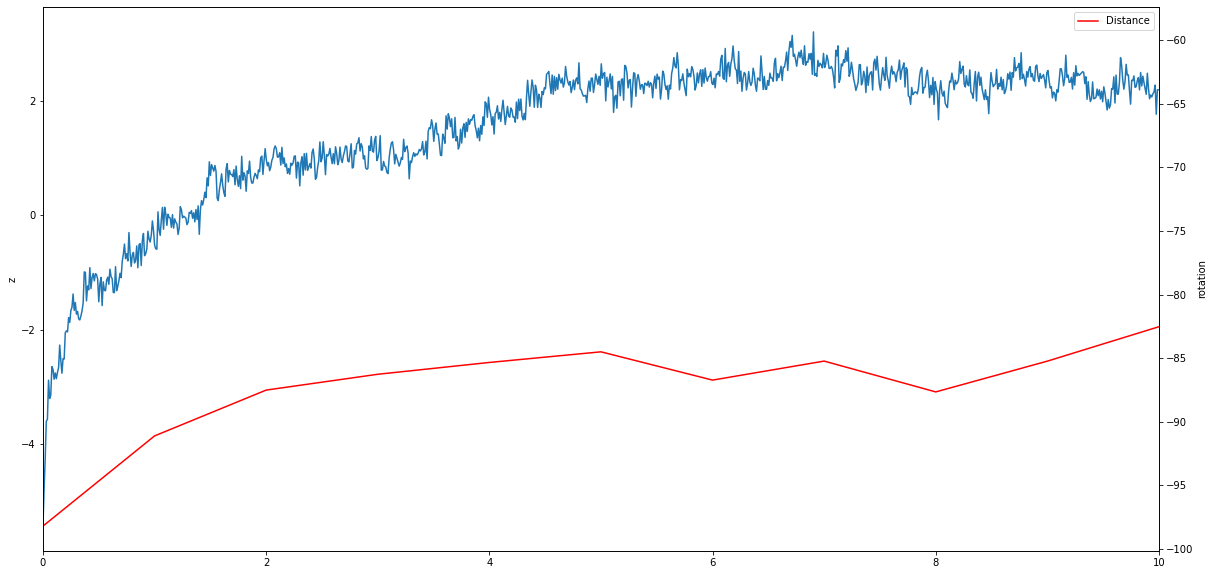

In [7]:
f = plt.figure(figsize=(20, 10))

t = np.linspace(0, 9996 / 1000, 1000)
plt.plot(t, ds_sb_ca[1:, 0])
plt.ylabel("z")

plt.twinx()
plt.plot(ds_sb_ca[1:, 1], "r")
plt.ylabel("rotation")

plt.legend(["Distance", "Spin"])
plt.xlim([0, 10])
plt.xlabel("Time (ns)")

In [8]:
import sys

sys.path.insert(1, "../python/")
import util

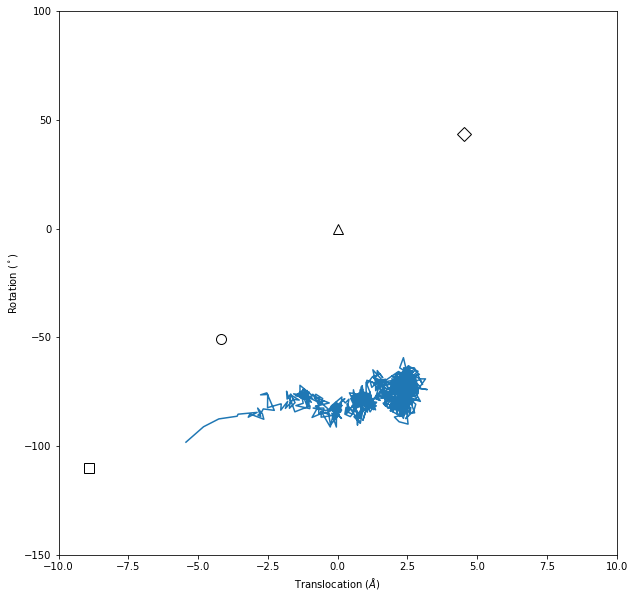

In [9]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(ds_sb_ca[1:, 0], ds_sb_ca[1:, 1])
util.format_cvs(ax)

Text(0, 0.5, 'z')

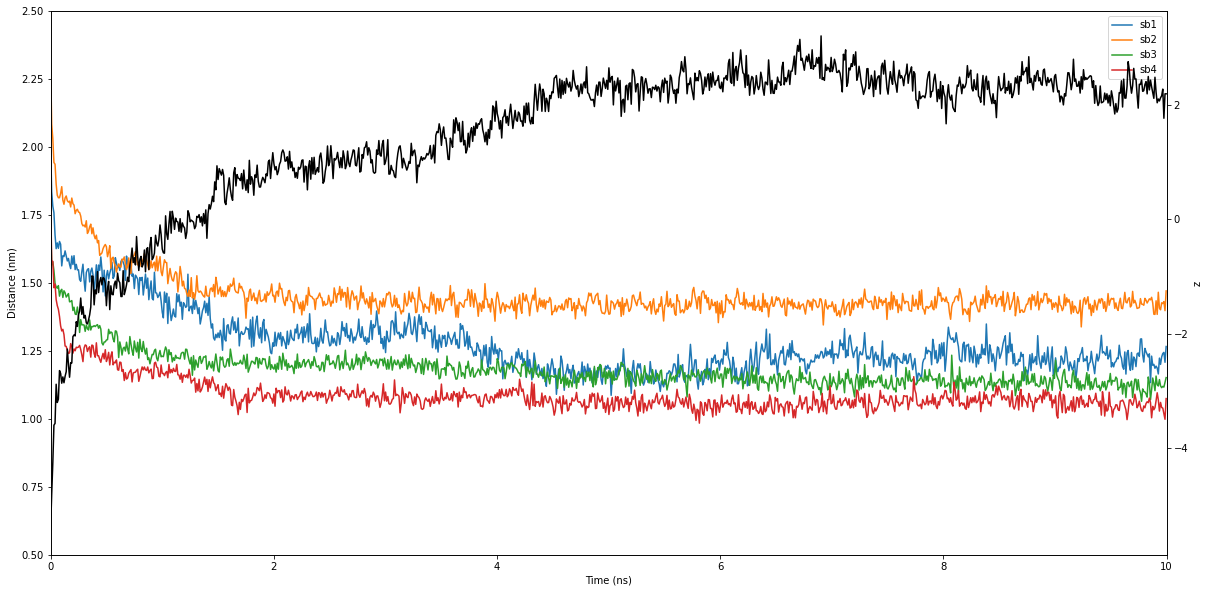

In [28]:
f = plt.figure(figsize=(20, 10))

t = np.linspace(0, 9996 / 1000, 1000)
for i in range(16, 20):
    plt.plot(t, traj_sb_ca[:, i], label=f"sb{i-15}")
plt.legend()
plt.xlim([0, 10])
plt.ylim([0.5, 2.5])
plt.xlabel("Time (ns)")
plt.ylabel("Distance (nm)")

plt.twinx()
plt.plot(t, ds_sb_ca[1:, 0], "-k")
plt.ylabel("z")

## Just salt bridges 

In [23]:
traj_sb = np.loadtxt("../abmd/run_8/plumed-sb-only.txt")
ds_sb = np.loadtxt("../abmd/run_8/abmd-sb-only.txt")

In [24]:
with open("../abmd/run_8/plumed-sb-only.txt", mode="r") as f:
    print(next(f))

#! FIELDS time sb1 sb2 sb3 sb4 abmd.bias abmd.sb1_min abmd.sb2_min abmd.sb3_min abmd.sb4_min abmd.force2



In [25]:
traj_sb.shape

(1000, 11)

In [26]:
ds_sb.shape

(1001, 2)

(0.0, 10.0)

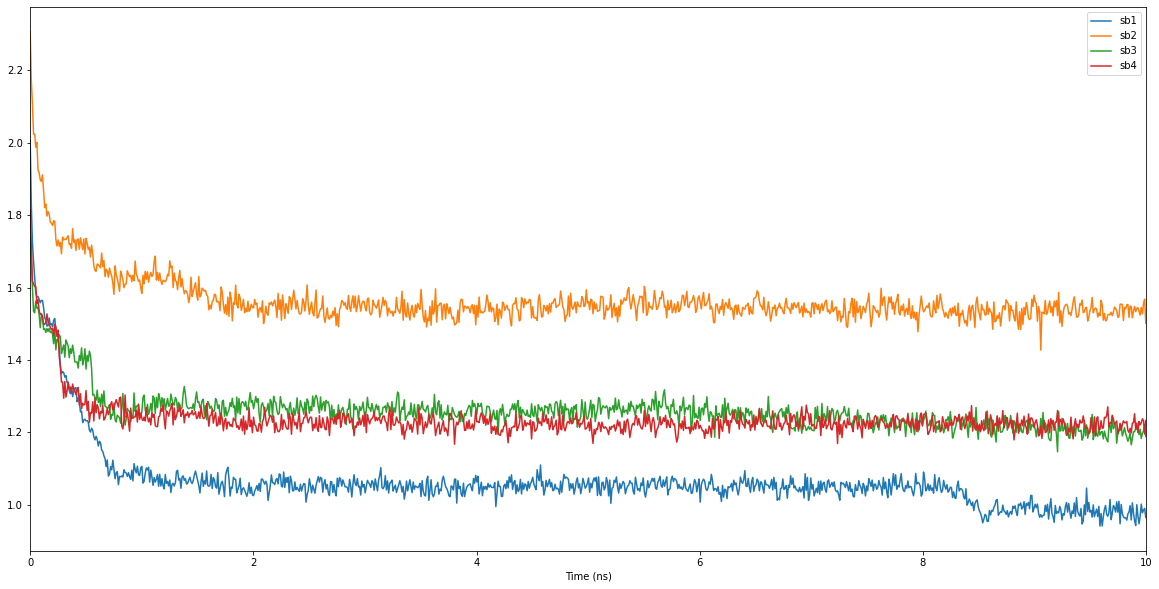

In [29]:
f = plt.figure(figsize=(20, 10))
t = np.linspace(0, 9996 / 1000, 1000)
for i in range(1, 5):
    plt.plot(t, traj_sb[:, i], label=f"sb{i}")
plt.legend()
plt.xlabel("Time (ns)")
plt.xlim([0, 10])

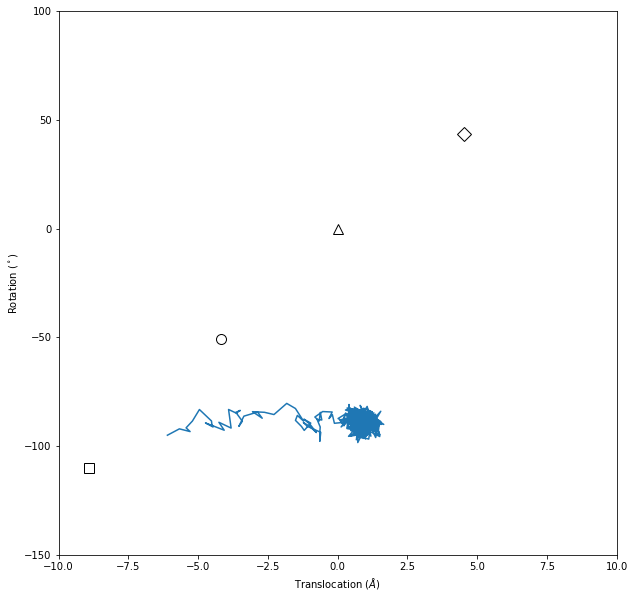

In [31]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(ds_sb[1:, 0], ds_sb[1:, 1])
util.format_cvs(ax)

## Salt bridge with Cz 

In [32]:
traj_cz = np.loadtxt("../abmd/run_8/plumed-sb-cz.txt")
ds_cz = np.loadtxt("../abmd/run_8/abmd-sb-cz.txt")

In [33]:
ds_cz.shape

(1001, 2)

(0.0, 10.0)

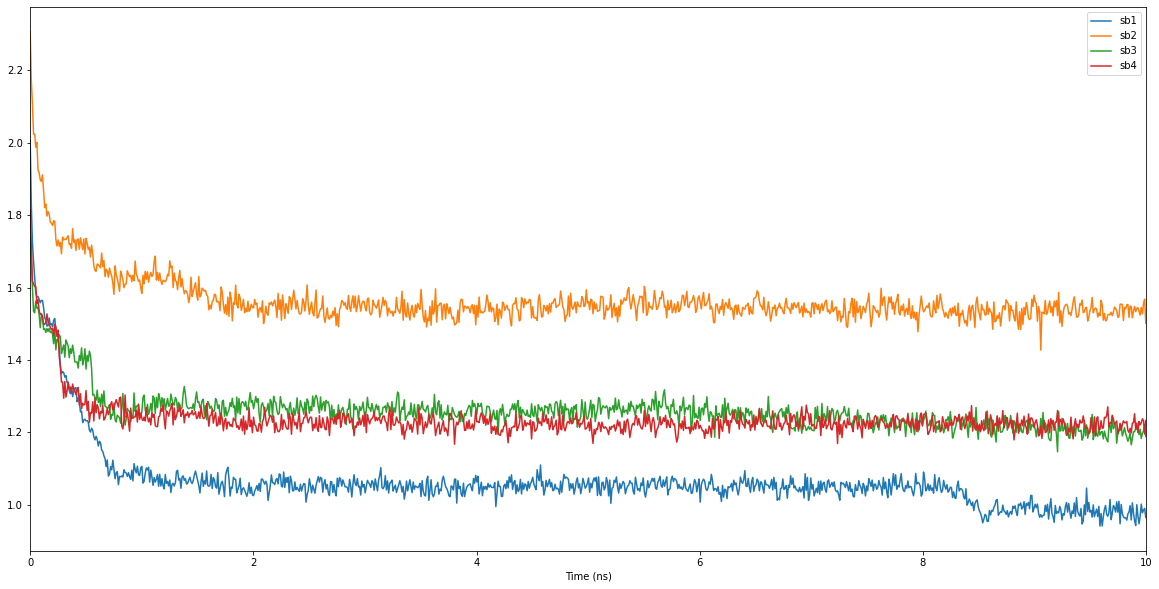

In [38]:
f = plt.figure(figsize=(20, 10))
t = np.linspace(0, 9996 / 1000, 1000)
for i in range(1, 5):
    plt.plot(t, traj_sb[:, i], label=f"sb{i}")

plt.legend()
plt.xlabel("Time (ns)")
plt.xlim([0, 10])

(0.0, 10.0)

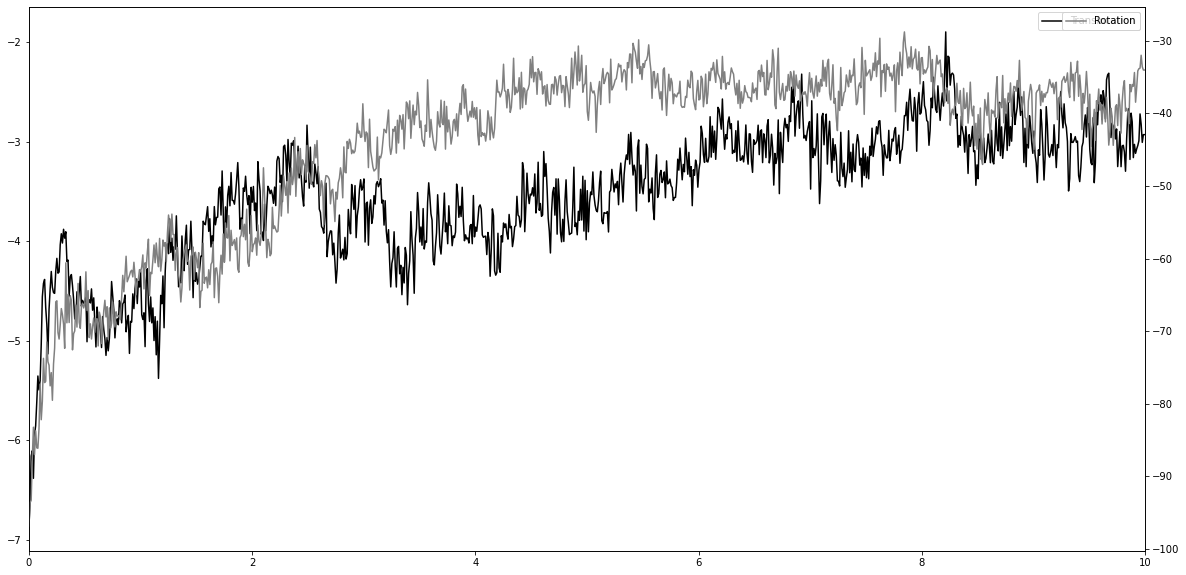

In [45]:
f = plt.figure(figsize=(20, 10))
plt.plot(t, ds_cz[1:, 0], "k")
plt.legend(["Translocation"])

plt.twinx()
plt.plot(t, ds_cz[1:, 1], "0.5")

plt.legend(["Rotation"])
plt.xlabel("Time (ns)")
plt.xlim([0, 10])

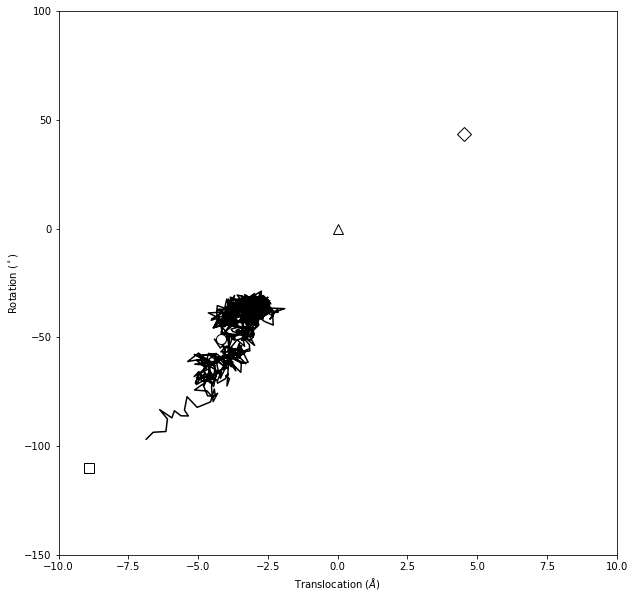

In [46]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(ds_cz[1:, 0], ds_cz[1:, 1], "k")
util.format_cvs(ax)

Better!

### 2nd version of Cz salt bridges

In [55]:
from matplotlib import ticker

In [48]:
traj_cz_2 = np.loadtxt("../abmd/run_8/plumed-sb-cz-2.txt")
ds_cz_2 = np.loadtxt("../abmd/run_8/abmd-sb-cz-2.txt")

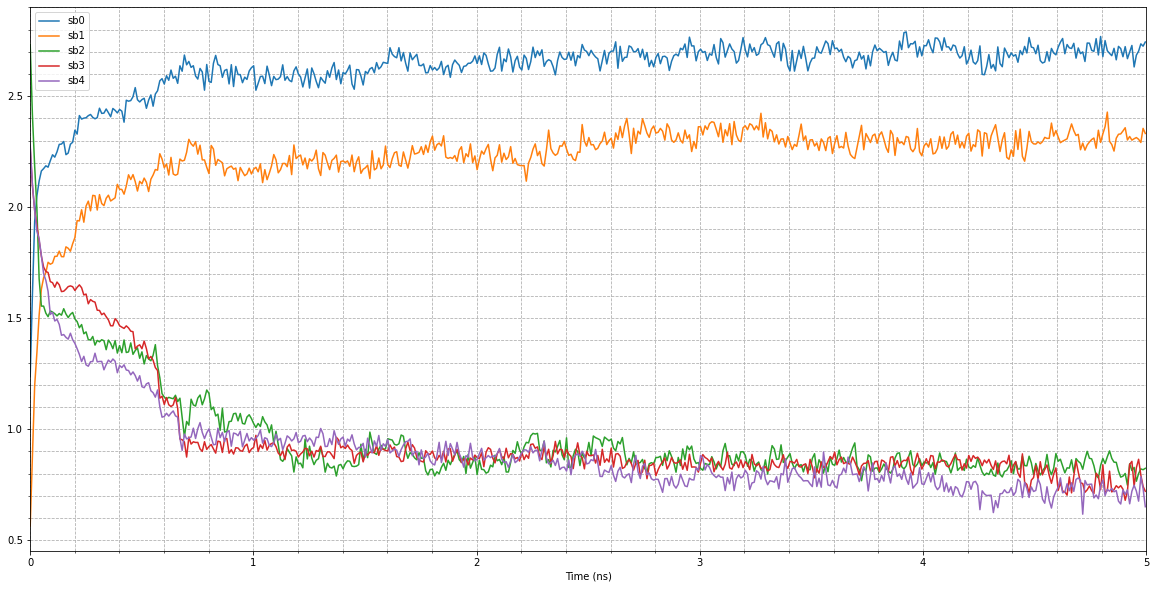

In [71]:
f, ax = plt.subplots(figsize=(20, 10))
t = np.linspace(0, 4996 / 1000, 500)
for i in range(1, 6):
    ax.plot(t, traj_cz_2[:, i], label=f"sb{i-1}")


ax.legend()
ax.set_xlabel("Time (ns)")
ax.set_xlim([0, 5])

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.grid(b=True, which="major", linestyle="--")
ax.grid(b=True, which="minor", linestyle="--")

(0.0, 5.0)

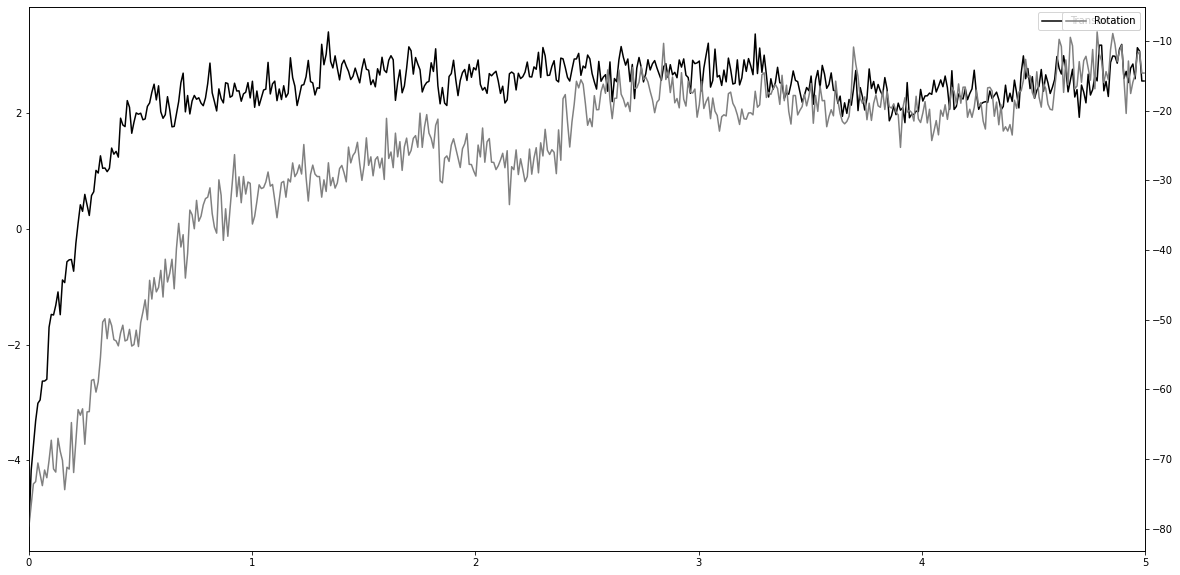

In [53]:
f = plt.figure(figsize=(20, 10))
plt.plot(t, ds_cz_2[1:, 0], "k")
plt.legend(["Translocation"])

plt.twinx()
plt.plot(t, ds_cz_2[1:, 1], "0.5")

plt.legend(["Rotation"])
plt.xlabel("Time (ns)")
plt.xlim([0, 5])

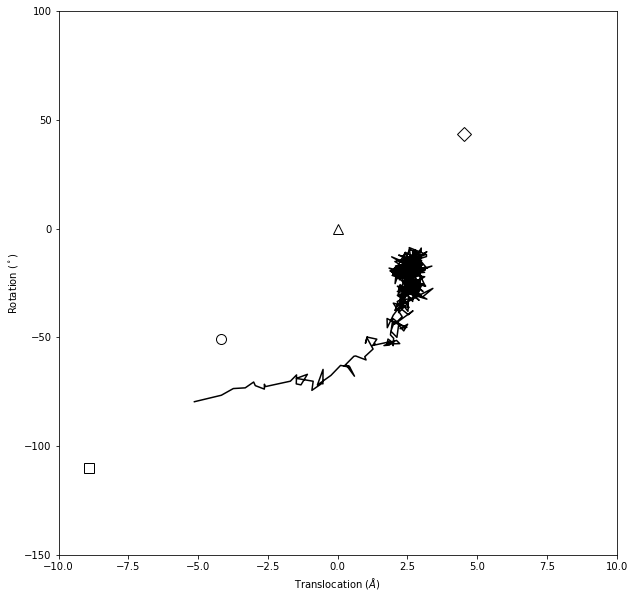

In [54]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(ds_cz_2[1:, 0], ds_cz_2[1:, 1], "k")
util.format_cvs(ax)

Getting closer to up state

# 50 ns run

In [10]:
traj_50 = np.loadtxt("../abmd/run_6/plumed.txt")
ds_50 = np.loadtxt("../abmd/run_6/abmd.txt")

In [18]:
ds_50.shape

(5001, 2)

In [13]:
with open("../abmd/run_6/plumed.txt", mode="r") as f:
    print(next(f))

#! FIELDS time s4p.x s4p.y s4p.z refp.x refp.y refp.z z abmd.bias abmd.z_min abmd.force2



(0.0, 50.0)

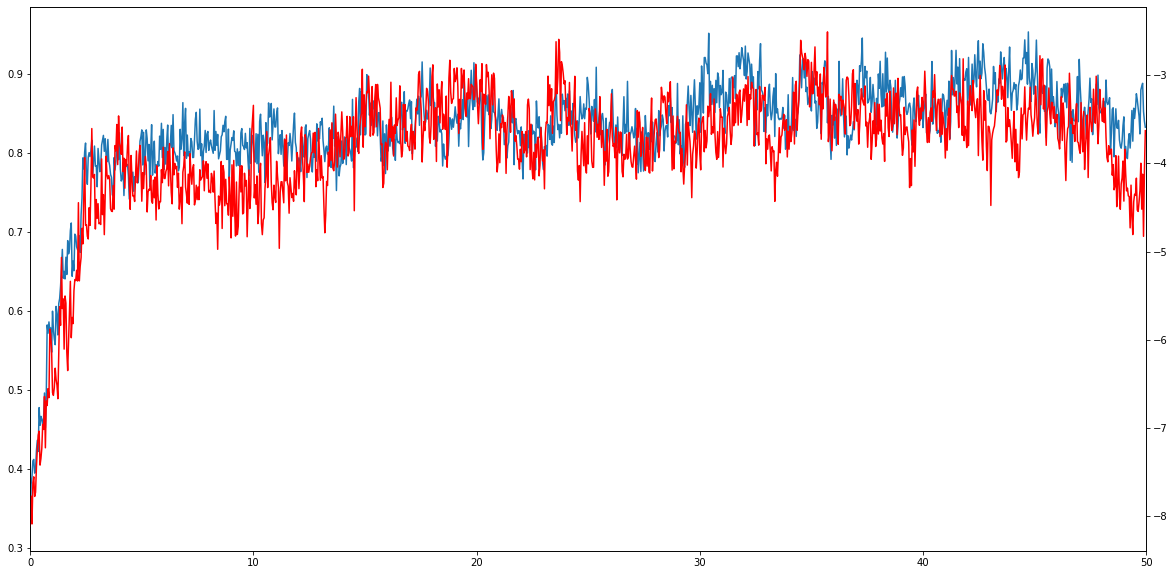

In [20]:
f = plt.figure(figsize=(20, 10))

t = np.linspace(0, 49.996, 12500)
plt.plot(t[::10], traj_50[::10, 7])
plt.twinx()
plt.plot(t[::10], ds_50[1::4, 0], "r")
plt.xlabel("Time (ns)")
plt.xlim([0, 50])

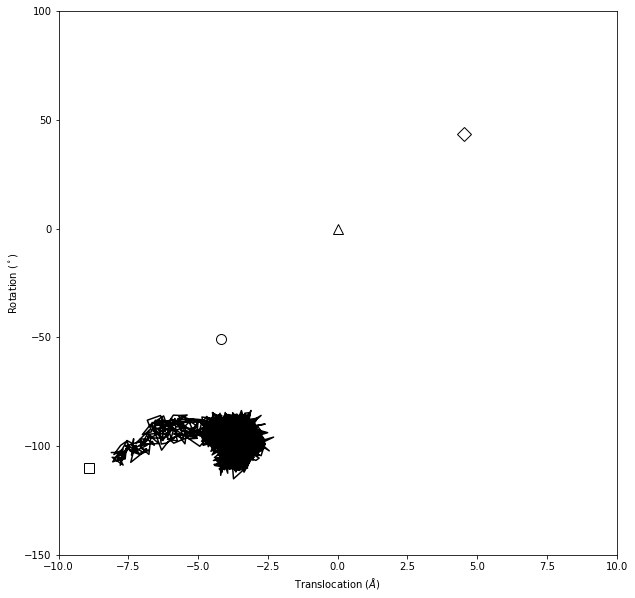

In [47]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(ds_50[1:, 0], ds_50[1:, 1], "k")
util.format_cvs(ax)

# New z-distance (inspired by Schwaiger BJ 2011) 

4.16.21

## only with z-distance

In [3]:
traj_3 = np.loadtxt("../abmd/run_10/plumed.txt")
ds_3 = np.loadtxt("../abmd/run_10/abmd.txt")
traj_5 = np.loadtxt("../abmd/run_10/plumed-2.txt")
ds_5 = np.loadtxt("../abmd/run_10/abmd-2.txt")

In [4]:
with open("../abmd/run_10/plumed.txt") as f:
    print(next(f))

#! FIELDS time r theta proj abmd.bias abmd.proj_min abmd.force2



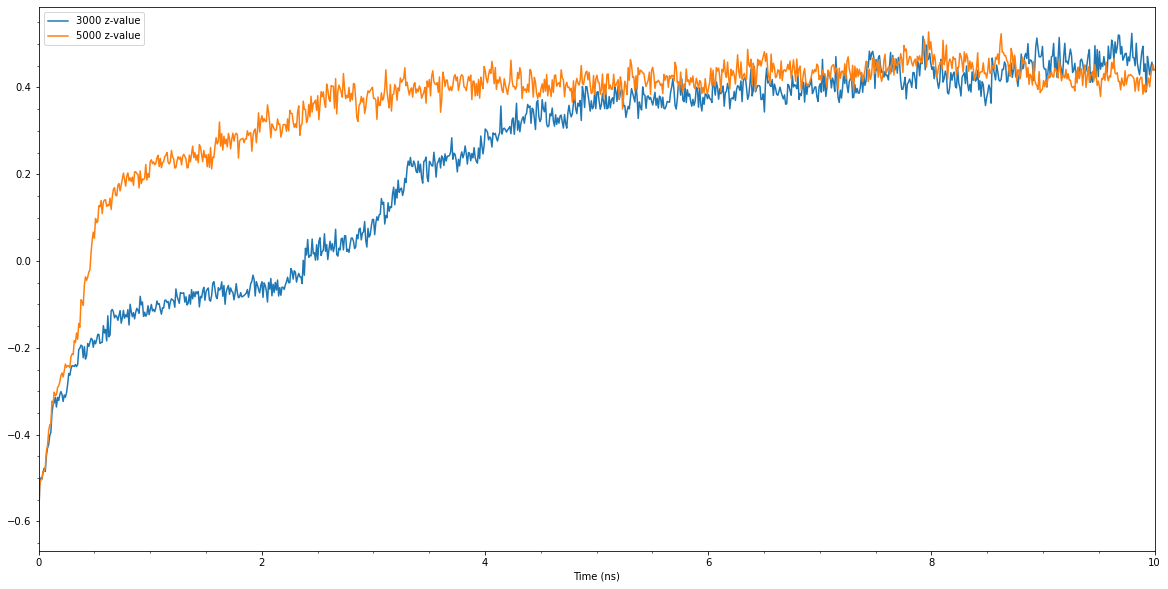

In [6]:
f, ax = plt.subplots(figsize=(20, 10))
t = np.linspace(0, 9996 / 1000, 1000)
ax.plot(t, traj_3[:, 3], label="3000 z-value")
ax.plot(t, traj_5[:, 3], label="5000 z-value")

ax.legend()
ax.set_xlabel("Time (ns)")
ax.set_xlim([0, 10])

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

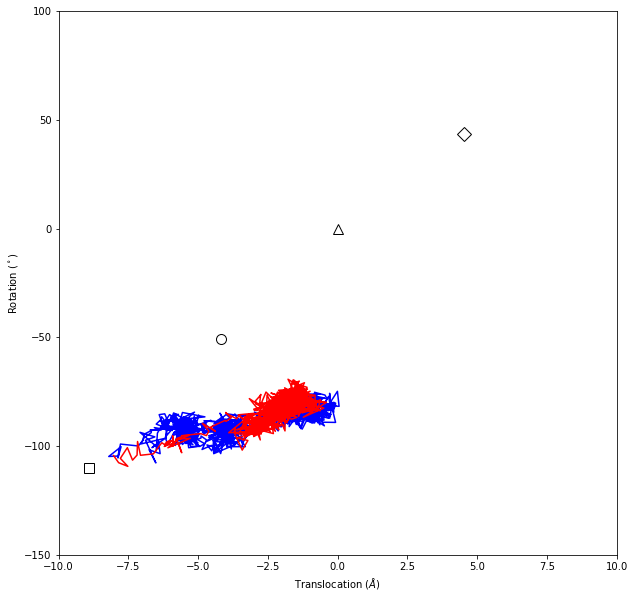

In [7]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(ds_3[1:, 0], ds_3[1:, 1], "b")
ax.plot(ds_5[1:, 0], ds_5[1:, 1], "r")
util.format_cvs(ax)

## with salt bridges 

In [8]:
traj_3_cz = np.loadtxt("../abmd/run_10/plumed-cz.txt")
ds_3_cz = np.loadtxt("../abmd/run_10/abmd-cz.txt")
traj_5_cz = np.loadtxt("../abmd/run_10/plumed-cz-2.txt")
ds_5_cz = np.loadtxt("../abmd/run_10/abmd-cz-2.txt")

In [9]:
with open("../abmd/run_10/plumed-cz.txt") as f:
    print(next(f))

#! FIELDS time r theta proj sb0 sb1 sb2 sb3 sb4 abmd.bias abmd.proj_min abmd.sb0_min abmd.sb1_min abmd.sb2_min abmd.sb3_min abmd.sb4_min abmd.force2



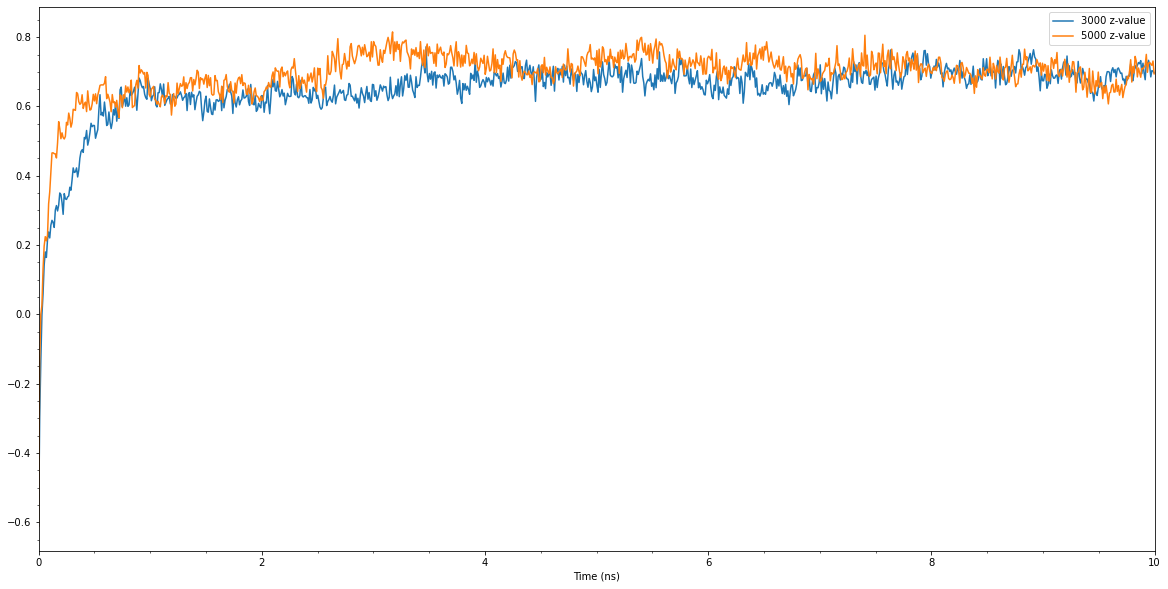

In [10]:
f, ax = plt.subplots(figsize=(20, 10))
t = np.linspace(0, 9996 / 1000, 1000)
ax.plot(t, traj_3_cz[:, 3], label="3000 z-value")
ax.plot(t, traj_5_cz[:, 3], label="5000 z-value")

ax.legend()
ax.set_xlabel("Time (ns)")
ax.set_xlim([0, 10])

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

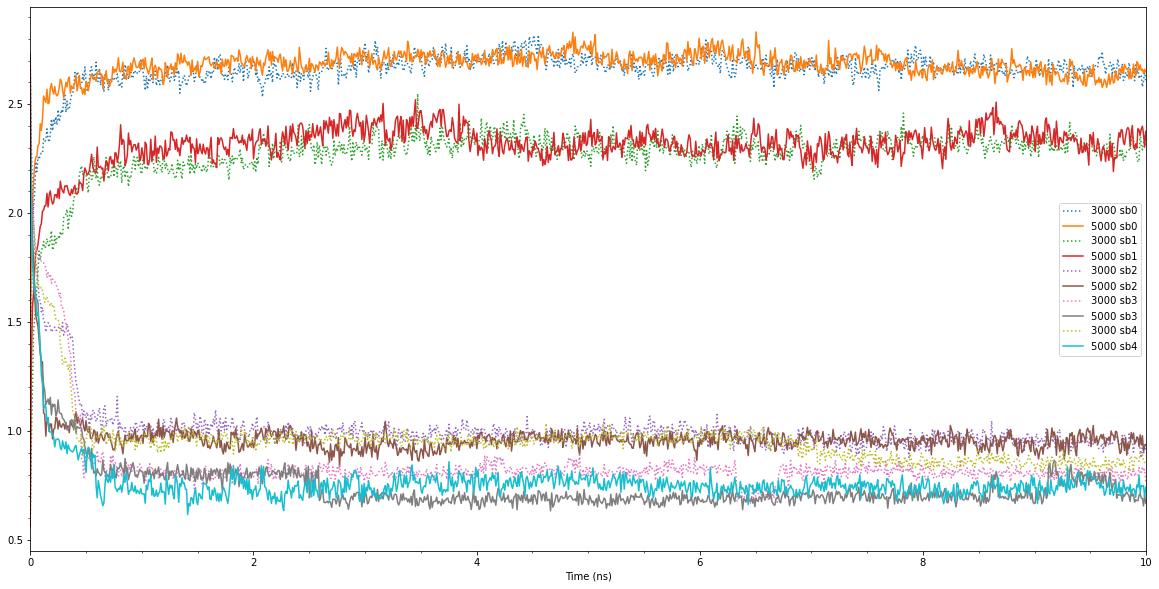

In [12]:
f, ax = plt.subplots(figsize=(20, 10))
t = np.linspace(0, 9996 / 1000, 1000)
for i in range(4, 9):
    ax.plot(t, traj_3_cz[:, i], ":", label=f"3000 sb{i-4}")
    ax.plot(t, traj_5_cz[:, i], label=f"5000 sb{i-4}")

ax.legend()
ax.set_xlabel("Time (ns)")
ax.set_xlim([0, 10])

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

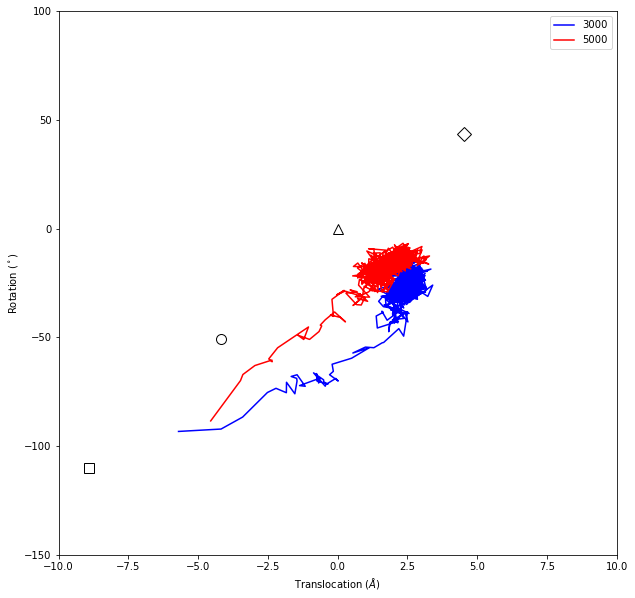

In [22]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(ds_3_cz[:, 0], ds_3_cz[:, 1], "b", label="3000")
ax.plot(ds_5_cz[:, 0], ds_5_cz[:, 1], "r", label="5000")
ax.legend()
util.format_cvs(ax)

## how well does our coordinate match translocation CV? 

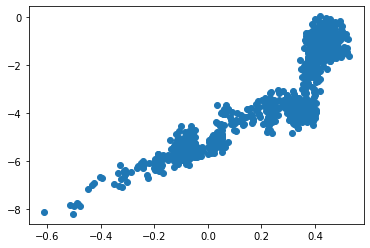

In [17]:
plt.scatter(traj_3[:, 3], ds_3[:-1, 0])

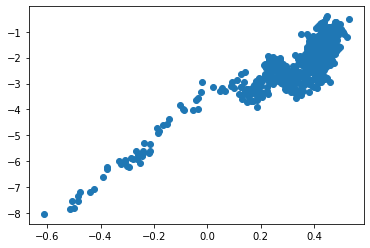

In [19]:
plt.scatter(traj_5[:, 3], ds_5[1:, 0])

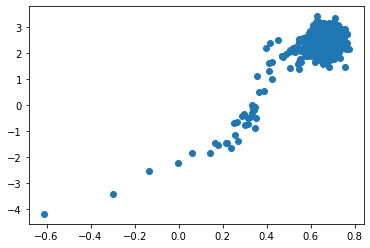

In [20]:
plt.scatter(traj_3_cz[:, 3], ds_3_cz[1:, 0])

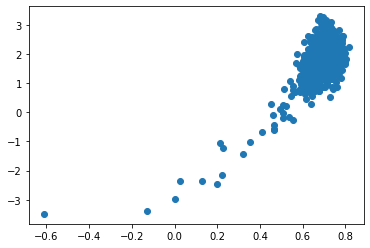

In [21]:
plt.scatter(traj_5_cz[:, 3], ds_5_cz[1:, 0])

Answer: pretty well I guess

# 100 ns run 

4.19.21

In [3]:
traj_abmd = np.loadtxt("../abmd/run_11/plumed.txt")
ds_abmd = np.loadtxt("../abmd/run_11/abmd.txt")

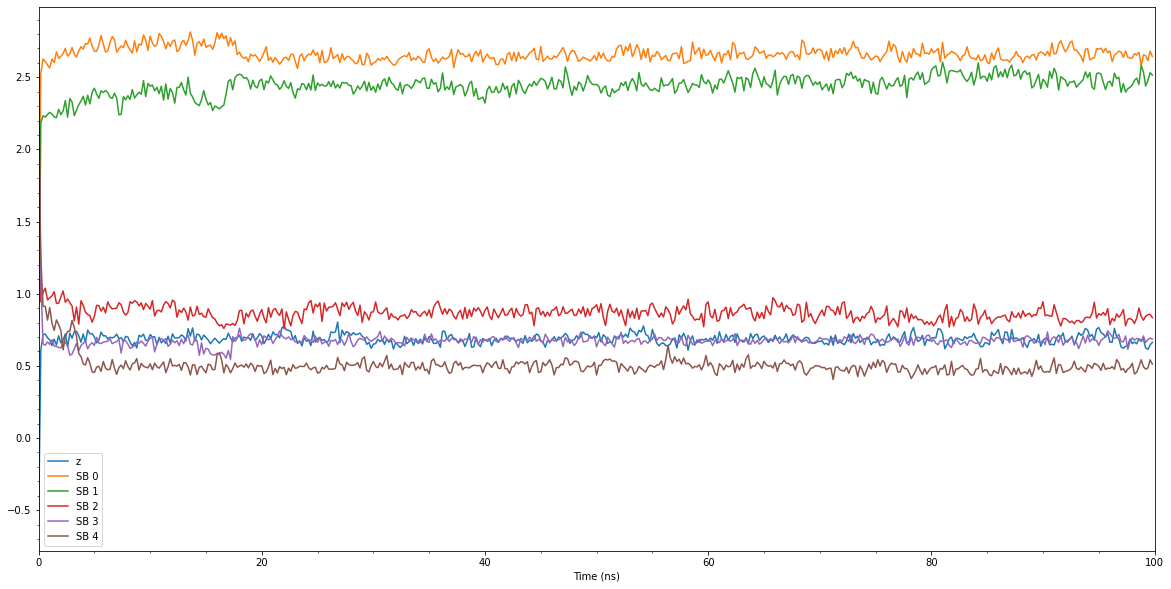

In [5]:
f, ax = plt.subplots(figsize=(20, 10))
t = np.linspace(0, 99980 / 1000, 5000)
ax.plot(t[::10], traj_abmd[::10, 3], label="z")
for i in range(4, 9):
    ax.plot(t[::10], traj_abmd[::10, i], label=f"SB {i-4}")

ax.legend()
ax.set_xlabel("Time (ns)")
ax.set_xlim([0, 100])

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

No handles with labels found to put in legend.


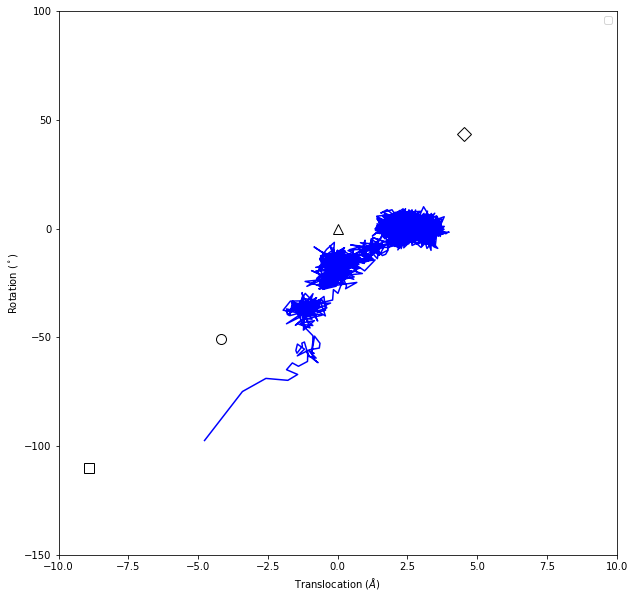

In [6]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(ds_abmd[:, 0], ds_abmd[:, 1], "b")

ax.legend()
util.format_cvs(ax)

(0.0, 0.82)

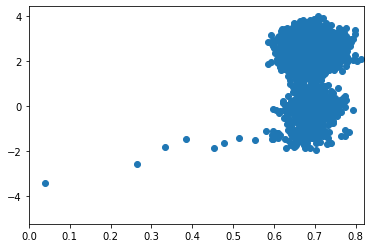

In [10]:
plt.scatter(traj_abmd[:, 3], ds_abmd[:-1, 0])
plt.xlim([0, 0.82])

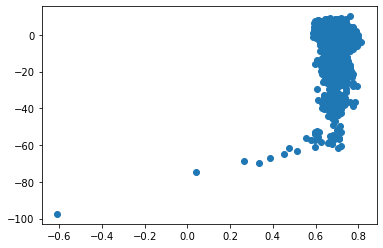

In [8]:
plt.scatter(traj_abmd[:, 3], ds_abmd[:-1, 1])